In [27]:
# !pip install -U pip 
# !pip install -U setuptools wheel
# !pip install -U autogluon
# !pip install -U torchxrayvision

     |████████████████████████████████| 29.0 MB 33.1 MB/s            


In [28]:
import pandas as pd 
import numpy as np
import os
import autogluon.core as ag
from autogluon.vision import ImageDataset, ImagePredictor
from sklearn.model_selection import train_test_split
import torchxrayvision as xrv

In [37]:
class Constants:
    DATA_DIR = "./tum-ai-hackathon-model-implementation/data"
    FULL_DIR = "./full_data"
    SUBSET_NAME="Dataset_Chest_X_Ray_Sample.csv"
    FULLSET_NAME="Data_Entry_2017.csv"
    IMG_DIR = "images_sample"
    FULLIMG_DIR = "images"
    IMG = "image"
    LABEL = "label"
    AGE = "Patient_Age"
    GENDER = "Patient_Gender"
    
const = Constants()

## Load Data

In [39]:
dataset = pd.read_csv(os.path.join(const.DATA_DIR, const.SUBSET_NAME), sep=';')
dataset.head(3)
dataset['Finding_Labels'].value_counts()

No Finding            6621
Infiltration          1053
Atelectasis            510
Effusion               453
Nodule                 292
Pneumothorax           231
Mass                   207
Consolidation          141
Pleural_Thickening     119
Cardiomegaly           113
Emphysema               88
Fibrosis                87
Edema                   55
Pneumonia               36
Hernia                  10
Name: Finding_Labels, dtype: int64

In [7]:
dataset.rename(columns={"Image_Index": "image", "Finding_Labels": "label"}, inplace=True)
dataset.head(3)

,image,label,Follow_up,Patient_ID,Patient_Age,Patient_Gender,View_Position,Original_Image_Width,Original_Image_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,"0,168","0,168"
1,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,"0,168","0,168"
2,00000005_003.png,No Finding,3,5,69,F,PA,2992,2991,"0,143","0,143"


In [11]:
dataset['image'] = dataset['image'].apply(lambda x: os.path.join(const.DATA_DIR, const.IMG_DIR, x))
dataset.head(3)

,image,label,Follow_up,Patient_ID,Patient_Age,Patient_Gender,View_Position,Original_Image_Width,Original_Image_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,./data/images_sample/00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,"0,168","0,168"
1,./data/images_sample/00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,"0,168","0,168"
2,./data/images_sample/00000005_003.png,No Finding,3,5,69,F,PA,2992,2991,"0,143","0,143"


In [47]:
dataset = pd.read_csv(os.path.join(const.FULL_DIR, const.FULLSET_NAME), sep=',')
dataset.head(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN


In [48]:
def split_labels(text):
    return text.split('|')[0]

dataset.rename(columns={"Image Index": "image", "Finding Labels": "label"}, inplace=True)
dataset['label'] = dataset['label'].apply(split_labels)
dataset.head(3)

,image,label,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly,2,1,58,M,PA,2500,2048,0.168,0.168,NaN


In [49]:
dataset['image'] = dataset['image'].apply(lambda x: os.path.join(const.FULL_DIR, const.FULLIMG_DIR, x))
dataset.head(3)

,image,label,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,./full_data/images/00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,./full_data/images/00000001_001.png,Cardiomegaly,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,./full_data/images/00000001_002.png,Cardiomegaly,2,1,58,M,PA,2500,2048,0.168,0.168,NaN


In [50]:
train, test = train_test_split(dataset, test_size=0.1)

## Training the model

Epoch[31] Batch [9699]	Speed: 125.874570 samples/sec	accuracy=0.540477	lr=0.000002
Epoch[31] Batch [9749]	Speed: 127.745702 samples/sec	accuracy=0.540462	lr=0.000002
Epoch[31] Batch [9799]	Speed: 129.187876 samples/sec	accuracy=0.540485	lr=0.000002
Epoch[31] Batch [9849]	Speed: 127.441907 samples/sec	accuracy=0.540508	lr=0.000002
Epoch[31] Batch [9899]	Speed: 130.249808 samples/sec	accuracy=0.540467	lr=0.000002
Epoch[31] Batch [9949]	Speed: 127.696386 samples/sec	accuracy=0.540653	lr=0.000002
Epoch[31] Batch [9999]	Speed: 129.244095 samples/sec	accuracy=0.540550	lr=0.000002
Epoch[31] Batch [10049]	Speed: 128.370454 samples/sec	accuracy=0.540398	lr=0.000002
Epoch[31] Batch [10099]	Speed: 130.263329 samples/sec	accuracy=0.540507	lr=0.000002
Epoch[31] Batch [10149]	Speed: 126.805117 samples/sec	accuracy=0.540628	lr=0.000002
Epoch[31] Batch [10199]	Speed: 129.771738 samples/sec	accuracy=0.540772	lr=0.000002
Epoch[31] Batch [10249]	Speed: 126.737412 samples/sec	accuracy=0.540805	lr=0.000002

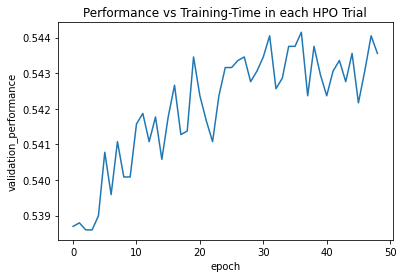

Finished, total runtime is 37981.02 s
{ 'best_config': { 'augmentation': { 'auto_augment': None,
                                     'color_jitter': 0.4,
                                     'cutmix': 0.0,
                                     'cutmix_minmax': None,
                                     'drop': 0.0,
                                     'drop_block': None,
                                     'drop_path': None,
                                     'hflip': 0.5,
                                     'mixup': 0.0,
                                     'mixup_mode': 'batch',
                                     'mixup_off_epoch': 0,
                                     'mixup_prob': 1.0,
                                     'mixup_switch_prob': 0.5,
                                     'no_aug': False,
                                     'ratio': (0.75, 1.3333333333333333),
                                     'scale': (0.08, 1.0),
                                     'smoot

In [ ]:
predictor = ImagePredictor()
predictor.fit(train, 
              time_limit=10*60*60,
              presets=['best_quality'],
              hyperparameters={
                  'epochs': 50,
                  'model': ag.Categorical('resnet50d', 'efficientnet_b1', 'mobilenetv3_large_100'),
              })
predictor.save()

In [ ]:
predictor.fit_summary()

{'train_acc': 0,
 'valid_acc': 0.5441482509225651,
 'total_time': 37980.76288104057,
 'best_config': {'img_cls': {'model': 'resnet50d',
   'pretrained': True,
   'global_pool_type': None},
  'data': {'img_size': None,
   'input_size': None,
   'crop_pct': 0.99,
   'mean': None,
   'std': None,
   'interpolation': '',
   'validation_batch_size_multiplier': 1},
  'optimizer': {'opt': 'sgd',
   'opt_eps': None,
   'opt_betas': None,
   'momentum': 0.9,
   'weight_decay': 0.0001,
   'clip_grad': None,
   'clip_mode': 'norm'},
  'train': {'batch_size': 8,
   'sched': 'step',
   'lr': 0.0003162278,
   'lr_noise': None,
   'lr_noise_pct': 0.67,
   'lr_noise_std': 1.0,
   'lr_cycle_mul': 1.0,
   'lr_cycle_limit': 1,
   'transfer_lr_mult': 0.01,
   'output_lr_mult': 0.1,
   'warmup_lr': 0.0001,
   'min_lr': 1e-05,
   'epochs': 50,
   'start_epoch': 0,
   'decay_epochs': 30,
   'warmup_epochs': 3,
   'cooldown_epochs': 10,
   'patience_epochs': 10,
   'decay_rate': 0.1,
   'bn_momentum': None,
 

In [29]:
predictor.save()

In [32]:
model = xrv.models.DenseNet(weights="densenet121-res224-nih")

predictor = ImagePredictor()
predictor.fit(train, 
              time_limit=2*60*60,
#               presets=['best_quality'],
              hyperparameters={
                  'epochs': 50,
                  'model': ag.Categorical(model),
              })

ImagePredictor sets accuracy as default eval_metric for classification problems.
Converting raw DataFrame to ImageDataset...
Detected 15 unique classes: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
If you feel the `classes` is inaccurate, please construct the dataset explicitly, e.g. train_data = ImageDataset(train_data, classes=["foo", "bar"])
Randomly split train_data into train[8112]/validation[902] splits.
Reset labels to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO


ValueError: Model not found in timm model zoo. Install mxnet if it supports the model.

In [21]:
predictor.list_models()

('adv_inception_v3',
 'bat_resnext26ts',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'cspdarknet53',
 'cspdarknet53_iabn',
 'cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'cspresnext50',
 'cspresnext50_iabn',
 'darknet53',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'densenet121',
 'densenet121d',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264',
 'densenet264d_iabn',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2n

## Evaluation

In [54]:
image_path = test.iloc[0]['image']
result = predictor.predict_proba(image_path)
print(result)

   Atelectasis  Cardiomegaly  Consolidation     Edema  Effusion  Emphysema  \
0      0.03743      0.020337       0.027051  0.014201   0.05837   0.014831   

   Fibrosis    Hernia  Infiltration      Mass  No Finding    Nodule  \
0  0.029753  0.009042      0.188618  0.038629    0.451636  0.041629   

   Pleural_Thickening  Pneumonia  Pneumothorax  
0            0.019874   0.012368      0.036231  


In [55]:
predictor.evaluate(test)

AttributeError: 'tuple' object has no attribute 'to'

## Precision, Recall, F1